<style>
    p { color: red; }
</style>

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys, os

In [2]:
%%HTML
<style>
  div.prompt {display:none}
  div {line-height: 150%;}
  li {color:black; font-size:large}
  p {color:black; font-size:large;}
  ul {list-style-type: none;}
</style>

<h1><center><u>Objects in Earth Orbit</u></center></h1>

1. [Project Description](#pc1)<br>
    1.1 [Background](#pc1)<br>
    1.2 [Project Capabilities](#pc2)<br>
    1.3 [Questions That Can Be Answered Using These Capabilities](#pc3)<br>
    <br>
2. [Visualize GPS Satellites](#gs0)<br>
    2.1 [Download GPS Satellite Data](#gs1)<br>
    2.2 [Open the CSV File and Adjust the Columns](#gs2)<br>
    2.3 [Plot the GPS Satellite Data](#gs3)<br>
    <br>
3. [Visualize Space Debris](#sd1)<br>
    3.1 [Download Space Debris Data](#sd1)<br>
    3.2 [Open the CSV File and Adjust the Columns](#sd2)<br>
    3.3 [Plot the Space Debris Data](#sd3)<br>

<a id="pc1"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

# 1. Project Description
## 1.1 Background

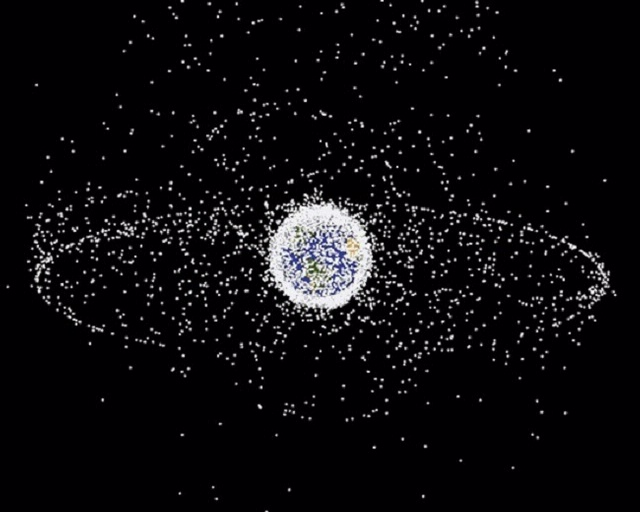

In [3]:
from IPython import display 
display.Image("data/7423_640.jpg")

### There are many types of objects in orbit around the earth:

* Communication satellites
* GPS satellites
* Weather satellites
* Scientific satellites
* Space debris
* The International Space Station
* The Hubble Space Telescope

> [What Is An Orbit?](https://www.nasa.gov/audience/forstudents/5-8/features/nasa-knows/what-is-orbit-58.html)

The positions of these objects in orbit are being monitored continuously using ground monitor stations and near space radar. Current and historical information related to orbitting objects is mostly public and available from certain websites, for example:

> [NORAD Current Orbital Data](https://celestrak.com/NORAD/elements/)  
> [NORAD Archives](https://celestrak.com/NORAD/archives/)

Sometimes a satellite must be repositioned. For example, GPS satellites must maintain positions relative to each other. 

> [Repositioning Satellites](https://www.satsig.net/orbit-research/geo-orbit-repositioning.htm)

This shows that satellite positions are publically available and can be received in real-time:

> [Real-Time Satellite Locations](https://in-the-sky.org/satmap_worldmap.php)


<a id="pc2"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

## 1.2 Project Capabilities

1. Create a general capability to download information related to objects in orbit. This information includes:
    * Current position and trajectory
    * Historical positions and trajectories
    * Type of object, satellite or debris, launch date, satellite characteristics
    * When was a satellite re-positioned 
    * What sensor is recording the data: ground monitor station, near space radar?<br>
    <br>
2. Create a *specific* capability to download information related to the satellites in the GPS constellation. This includes detailed position, orbital data, the characteristics and history of the GPS satellite.<br>
    <br>
3. Create a *specific* capability to download information related to space debris and in particular the Chinese Anti-Satellite Missile Test Debris.

<a id="pc3"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

<a id="pc2"></a>
## 1.3 Questions That Can Be Answered Using These Capabilities 
<a id="pc2"></a>
* Is a GPS satellite moving outside of its designated orbit?
* Is a GPS satellite too close or too far from adjacent satellites in its orbit?
* Predict if it is likely that a GPS satellite will be repositioned by the Space Operations Squadron within the next 10 days.
* For a particular GPS satellite, what are the 100 closest debris objects at the current time?
* Predict the likelihood of space debris entering a danger zone around a GPS satellite.
* Estimate the probability that a particular debris object is associated with a particular debris cloud
* Based on the kinetic energy of a debris object, when is it likely that the debris object will enter the earth's atmosphere?
* What is the likelihood that a space debris object or a retired satellite will reach the earth? When and where?

<hr style="height:4px; border:none; color:black; background-color:black;">

### Some Useful Functions

In [4]:
def remove_spaces(colname):
    return colname.strip().replace(' ','_')

linestyles = ['-', '--', '-.', ':', ':o']

def plotReset():
    plt.clf # clear figure
    plt.cla # clear axes
    plt.figure(figsize=(15,15)) # this also clears the previous plot
    
def plotScatter(xColumn, yColumn, df_, color=None):
    if False: plt.scatter(env[xColumn], env[yColumn], alpha=1.0, zorder=2)
    if False: plt.plot(env[xColumn], env[yColumn], linestyle='dotted', alpha=0.8, zorder=1)
    plt.plot(df_[xColumn], df_[yColumn], 'o', alpha=1.0, color=color)

def plotFormats(title, xLabel, yLabel, legend, 
                xLim = (None,None), 
                yLim = (None,None),
                xTicks = (None,None,None), 
                yTicks = (None,None,None)):
    plt.xlabel(xLabel, fontsize=15, color='darkblue')
    plt.ylabel(yLabel, fontsize=15, color='darkblue')
    plt.xlim(xLim[0], xLim[1])
    plt.ylim(yLim[0], yLim[1])
    plt.title(title, fontsize=15, color='darkblue');
    plt.grid(True)
    plt.legend(legend[0], loc=legend[1])
    plt.xticks(fontsize=14, rotation=45)
    plt.yticks(fontsize=14, rotation=45)
    if xTicks[0] != None:
        plt.xticks(np.arange(xTicks[0], xTicks[1], step=xTicks[2]))
    if yTicks[0] != None:
        plt.yticks(np.arange(yTicks[0], yTicks[1], step=yTicks[2]))
    return

<a id="gs0"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

# 2. Visualize GPS Satellites

There are currently 30 satellites in the GPS constellation contained in 6 orbital planes. Each GPS satellite orbits twice per 24 hour day around the earth. The goal of the GPS constellation is to make sure that at least 4 GPS satellites are covering every point on the earth at any one time. There also exist much space debris (for various reasons) orbiting the earth. For example, a large pattern of space debris was created in 2007 when the Chinese intentionally destroyed its own satellite. The locations of satellites and space debris are mostly public information. This project proposes to monitor GPS satellite locations and their positions in space relative to space debris, including the Chinese anti-satellite missile test debris. The goal of this project is to determine how close space debris might come to our essential GPS fleet.

The GPS satellite data is presented in CSV format by the URL
> https://celestrak.com/NORAD/elements/gp.php?GROUP=GPS-OPS&FORMAT=CSV

It can be copied and pasted into an empty .csv file<br><br>
Similarly, the Chinese debris is available at
> https://celestrak.com/NORAD/elements/gp.php?CATNR=25544&FORMAT=CSV

<a id="gs1"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

## 2.1 Download GPS Satellite Data

In [5]:
import pycurl
from io import BytesIO

url = "https://celestrak.com/NORAD/elements/gp.php?GROUP=GPS-OPS&FORMAT=CSV"
csvFile = 'data/gps-today.csv'

buffer = BytesIO()
c = pycurl.Curl()
c.setopt(c.URL, url)
c.setopt(c.WRITEDATA, buffer)
c.perform()
c.close()

content = buffer.getvalue()

with open(csvFile, 'w') as f:
    print(content.decode('iso-8859-1'), file=f)
    
print(f'\nGPS Satellite Data has been downloaded to {csvFile}')


GPS Satellite Data has been downloaded to data/gps-today.csv


<a id="gs2"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

## 2.2 Open the CSV File and Adjust the Columns

### Open the CSV File

In [6]:
gps_orig = pd.read_csv(csvFile)
gps_orig.rename(columns = remove_spaces, inplace=True)

if False:
    print(f'Index is:\n{gps_orig.index}',
          f'Columns are:\n{gps_orig.columns}',
          f'Values are:\n{gps_orig.values[0:3]}', sep='\n\n')
gps_orig.iloc[:,:]

,OBJECT_NAME,OBJECT_ID,EPOCH,MEAN_MOTION,ECCENTRICITY,INCLINATION,RA_OF_ASC_NODE,ARG_OF_PERICENTER,MEAN_ANOMALY,EPHEMERIS_TYPE,CLASSIFICATION_TYPE,NORAD_CAT_ID,ELEMENT_SET_NO,REV_AT_EPOCH,BSTAR,MEAN_MOTION_DOT,MEAN_MOTION_DDOT
0,GPS BIIR-2 (PRN 13),1997-035A,2021-02-26T05:12:56.009088,2.005626,0.004722,55.4664,174.2507,56.9859,303.4445,0,U,24876,999,17310,0,8.000000e-08,0
1,GPS BIIR-4 (PRN 20),2000-025A,2021-02-26T10:21:03.252960,2.005630,0.005805,53.6935,98.6050,166.3578,329.9445,0,U,26360,999,15242,0,2.100000e-07,0
2,GPS BIIR-5 (PRN 28),2000-040A,2021-02-26T10:18:01.991808,2.005644,0.018109,55.8034,292.1347,282.5649,173.1336,0,U,26407,999,15110,0,2.600000e-07,0
3,GPS BIIR-8 (PRN 16),2003-005A,2021-02-25T09:01:42.636288,2.005660,0.012057,55.8572,291.9711,36.7429,144.1951,0,U,27663,999,13244,0,2.900000e-07,0
4,GPS BIIR-9 (PRN 21),2003-010A,2021-02-26T08:33:18.868032,2.005587,0.024448,54.7937,42.6393,291.9340,90.4961,0,U,27704,999,13126,0,-3.500000e-07,0
5,GPS BIIR-10 (PRN 22),2003-058A,2021-02-26T09:47:49.314624,2.005722,0.007198,53.5037,101.2727,300.1155,59.2574,0,U,28129,999,12594,0,2.100000e-07,0
6,GPS BIIR-11 (PRN 19),2004-009A,2021-02-26T02:05:25.789920,2.005701,0.008828,56.2212,352.7955,102.5240,26.3576,0,U,28190,999,12409,0,-6.900000e-07,0
7,GPS BIIR-13 (PRN 02),2004-045A,2021-02-26T04:06:27.435168,2.005698,0.020586,55.1309,42.6095,271.6005,193.9661,0,U,28474,999,11958,0,-3.400000e-07,0
8,GPS BIIRM-1 (PRN 17),2005-038A,2021-02-25T15:12:18.375264,2.005780,0.013734,56.3101,350.2202,269.6667,273.0243,0,U,28874,999,11297,0,-6.800000e-07,0
9,GPS BIIRM-2 (PRN 31),2006-042A,2021-02-26T05:48:59.052960,2.005549,0.009926,54.7969,228.2387,13.0439,168.2287,0,U,29486,999,10557,0,5.400000e-07,0


### Select and adjust the columns

In [7]:
# extract date/time column
gps_df = gps_orig.assign(
    date_time = lambda this : this.EPOCH.str[0:16].str.replace("T", " "))

# extract the PRN
gps_df["PRN"] = (
    gps_df["OBJECT_NAME"].str.replace(".*PRN", "PRN", regex=True)
                         .str.replace("\).*", "", regex=True)) 
    
# select the columns of interest
gps_df = gps_df.loc[:, ['date_time', 'OBJECT_NAME', 'PRN', 'ARG_OF_PERICENTER', 'RA_OF_ASC_NODE']]

# sort the columns by date and time
gps_df.sort_values(by=['date_time'], ascending=True, inplace=True)

gps_df.iloc[:,:]

,date_time,OBJECT_NAME,PRN,ARG_OF_PERICENTER,RA_OF_ASC_NODE
23,2021-02-23 02:10,GPS BIIF-9 (PRN 26),PRN 26,13.4005,284.5302
22,2021-02-23 10:51,GPS BIIF-8 (PRN 03),PRN 03,45.0595,106.9073
19,2021-02-24 04:59,GPS BIIF-5 (PRN 30),PRN 30,199.6398,228.4280
18,2021-02-25 04:55,GPS BIIF-4 (PRN 27),PRN 27,32.0490,346.7920
3,2021-02-25 09:01,GPS BIIR-8 (PRN 16),PRN 16,36.7429,291.9711
26,2021-02-25 09:12,GPS BIIF-12 (PRN 32),PRN 32,222.9780,166.4018
21,2021-02-25 13:39,GPS BIIF-7 (PRN 09),PRN 09,106.1310,165.8424
8,2021-02-25 15:12,GPS BIIRM-1 (PRN 17),PRN 17,269.6667,350.2202
11,2021-02-25 18:00,GPS BIIRM-4 (PRN 15),PRN 15,54.9495,160.2971
29,2021-02-25 18:03,GPS BIII-3 (PRN 23),PRN 23,149.9745,105.3305


In [8]:
gps_df.describe()

,ARG_OF_PERICENTER,RA_OF_ASC_NODE
count,30.000000,30.000000
mean,149.250507,192.866180
std,105.352896,107.169717
min,13.043900,42.609500
25%,50.121875,104.900075
50%,138.781800,171.465700
75%,225.185625,289.833300
max,356.907500,352.795500


<a id="gs3"></a>
<hr style="height:4px; border:none; color:black; background-color:black;">

## 2.3 Plot the GPS Satellite Data

### GPS Satellite Constellation Identified by the Pseudorandom Noise Code

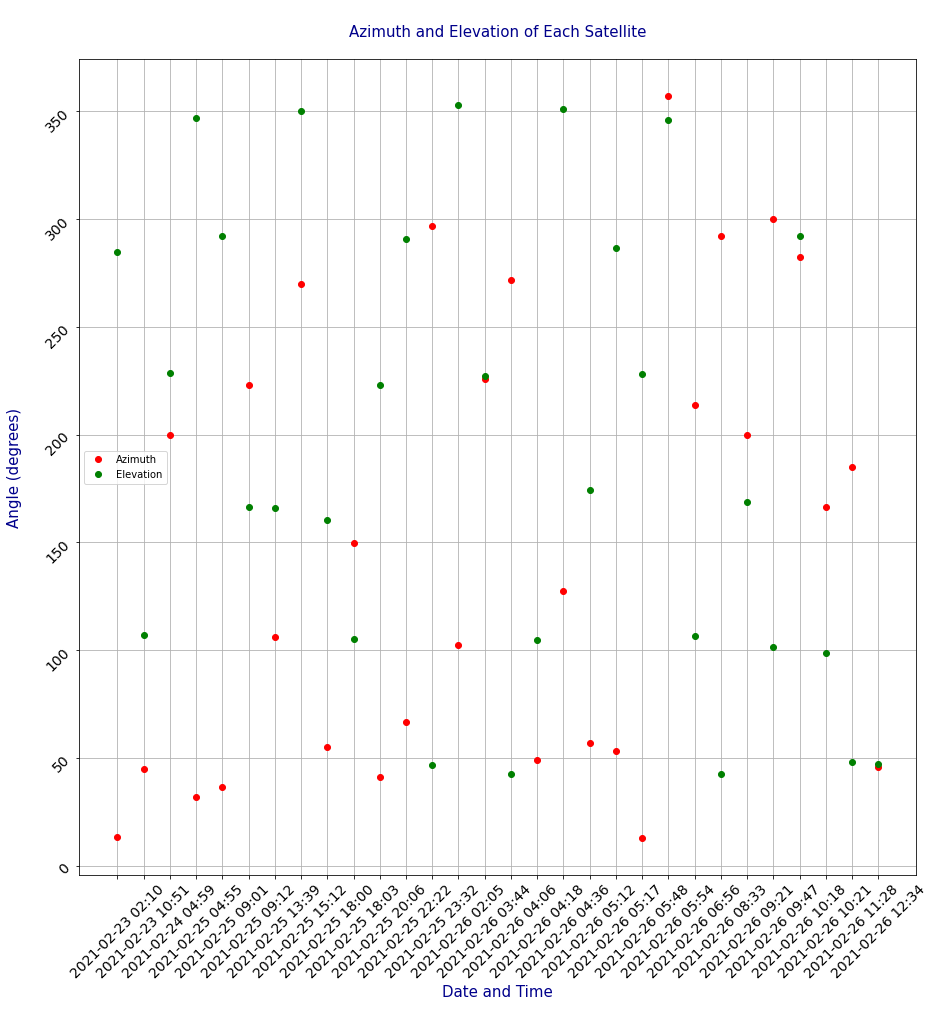

In [9]:
query = gps_df.loc[:,:]

title = "\nAzimuth and Elevation of Each Satellite\n"
xLabel = "Date and Time\n"
yLabel = "Angle (degrees)\n"
legend = (['Azimuth', 'Elevation'], 'center left')

plotReset()
plotScatter('date_time', 'ARG_OF_PERICENTER', query, color='Red')
plotScatter('date_time', 'RA_OF_ASC_NODE', query, color='Green')
plotFormats(title, xLabel, yLabel, legend, xTicks = (None,None,None))
plt.show()

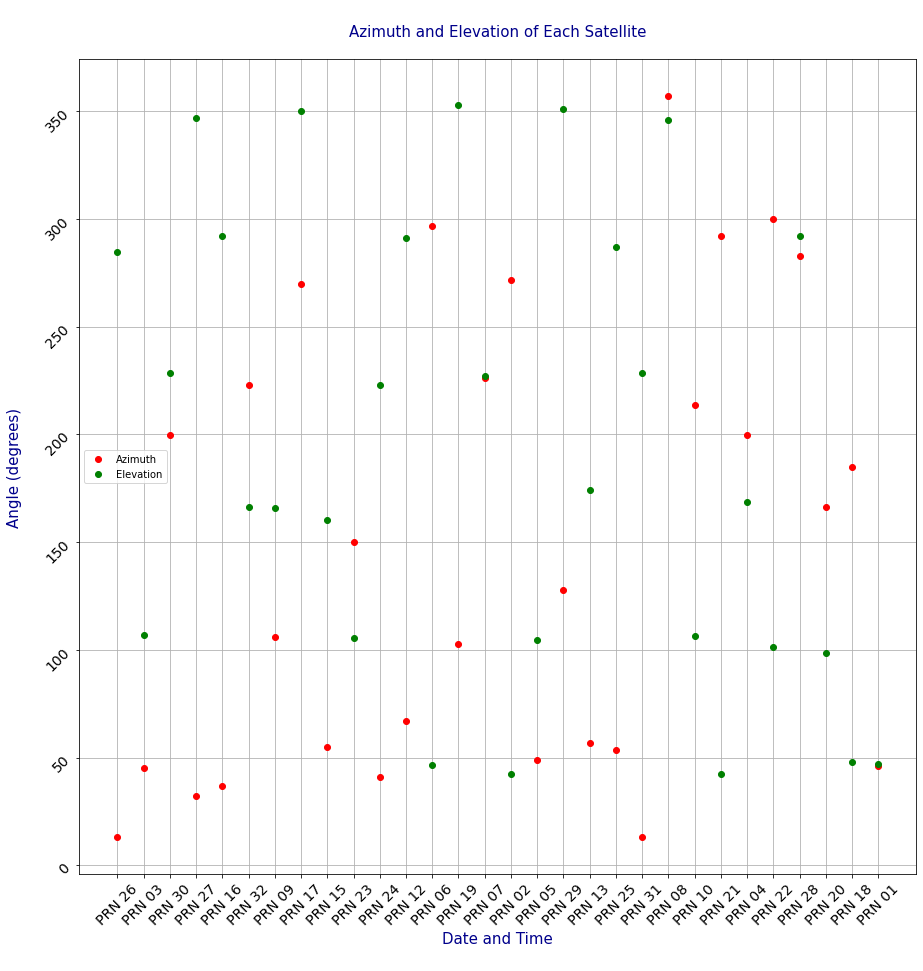

In [10]:
query = gps_df.loc[:,:]

title = "\nAzimuth and Elevation of Each Satellite\n"
xLabel = "Date and Time\n"
yLabel = "Angle (degrees)\n"
legend = (['Azimuth', 'Elevation'], 'center left')

plotReset()
plotScatter('PRN', 'ARG_OF_PERICENTER', query, color='Red')
plotScatter('PRN', 'RA_OF_ASC_NODE', query, color='Green')
plotFormats(title, xLabel, yLabel, legend, xTicks = (None,None,None))
plt.show()

  284.5302      13.4005       PRN 26
  106.9073      45.0595       PRN 03
   228.428     199.6398       PRN 30
   346.792       32.049       PRN 27
  291.9711      36.7429       PRN 16
  166.4018      222.978       PRN 32
  165.8424      106.131       PRN 09
  350.2202     269.6667       PRN 17
  160.2971      54.9495       PRN 15
  105.3305     149.9745       PRN 23
  222.9011      41.0367       PRN 24
  290.8726      66.8658       PRN 12
   46.8388     296.6564       PRN 06
  352.7955      102.524       PRN 19
  227.2864     225.9215       PRN 07
   42.6095     271.6005       PRN 02
  104.7566      49.0187       PRN 05
  350.9019     127.5891       PRN 29
  174.2507      56.9859       PRN 13
  286.7154      53.4314       PRN 25
  228.2387      13.0439       PRN 31
  345.8052     356.9075       PRN 08
   106.627     213.5512       PRN 10
   42.6393      291.934       PRN 21
  168.6807     199.7581       PRN 04
  101.2727     300.1155       PRN 22
  292.1347     282.5649       PRN 28
 

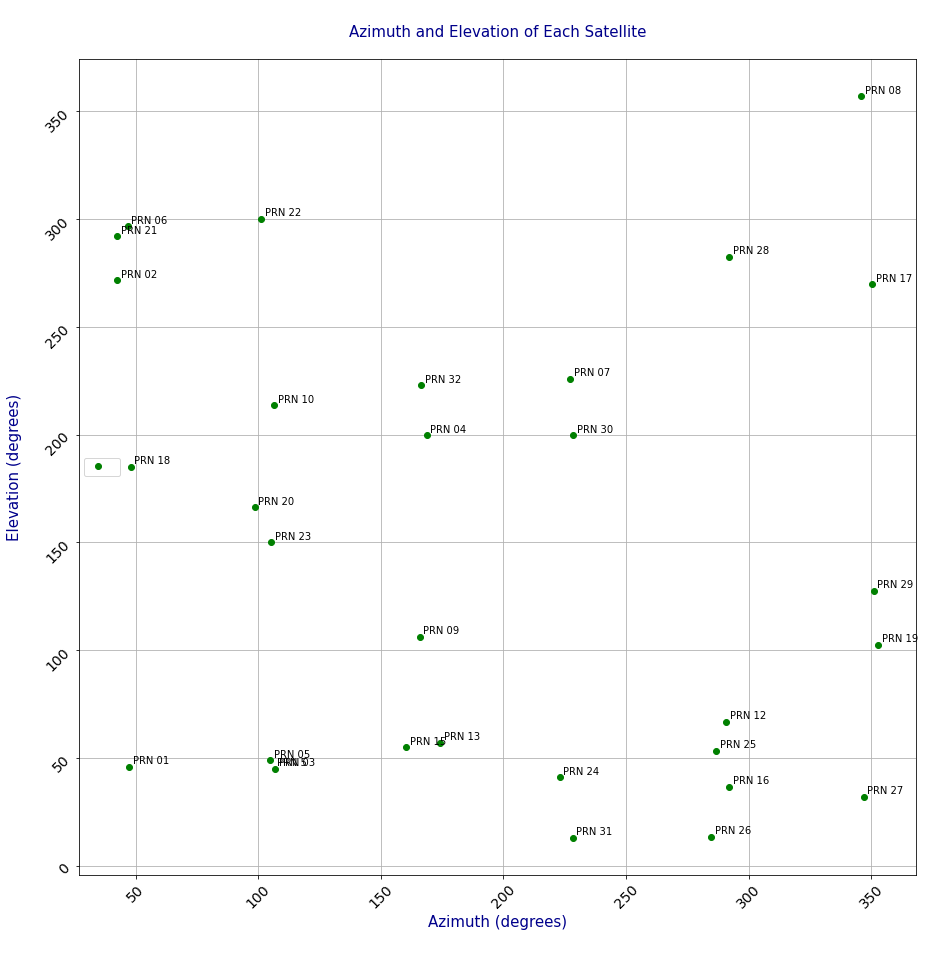

In [11]:
query = gps_df.loc[:,:]

title = "\nAzimuth and Elevation of Each Satellite\n"
xLabel = "Azimuth (degrees)\n"
yLabel = "Elevation (degrees)\n"
legend = (['', ''], 'center left')

plotReset()
plotScatter('RA_OF_ASC_NODE', 'ARG_OF_PERICENTER', query, color='Green')
plotFormats(title, xLabel, yLabel, legend, xTicks = (None,None,None))
plt.text(107.6802, 46.5899, 'PRN 5', horizontalalignment='left')
for i in gps_df.index: 
    print(f"{gps_df['RA_OF_ASC_NODE'][i]:>10}   "
          f"{gps_df['ARG_OF_PERICENTER'][i]:>10}   "
          f"{gps_df['PRN'][i]:>10}") 
    plt.text(gps_df['RA_OF_ASC_NODE'][i]+1.5, 
             gps_df['ARG_OF_PERICENTER'][i]+1.5, 
             gps_df['PRN'][i], 
             horizontalalignment='left')
plt.show()

<hr style="height:4px; border:none; color:black; background-color:black;">

## MISCELLANEOUS FUNCTIONS